# van der Waals isotherms in 3D


**Code:** #116-000

**File:** `apps/van_der_waals/p_v_T_3D.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jongablop/MinervaLab/master?urlpath=%2Fnotebooks%2Fapps%2Fvan_der_waals%2Fp_v_T_3D.ipynb)

-----------

## Interface

The main interface (``main_block_116_000``) contains the 3D ipyvolume figure ``fig3d`` and the ``play
`` and ``degrees_slider`` widgets. Those widgets update the angle of the camera of the figure.

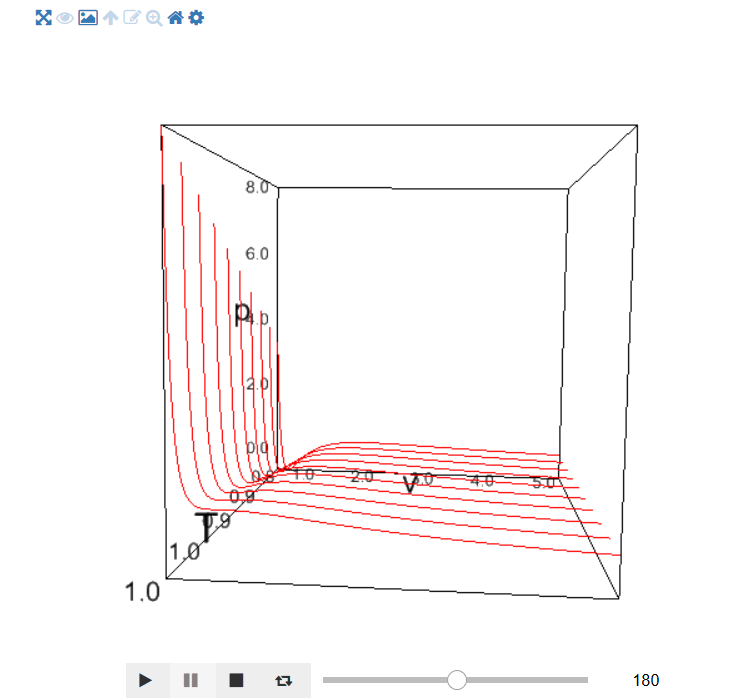

In [1]:
from IPython.display import Image
Image(filename='../../static/images/116-000_1.png')

## Packages

In [2]:
import ipywidgets as widgets
import ipyvolume as ipv

import numpy as np

## Physical functions

This are the functions that have a physical meaning:

- `get_relative_isotherms`

In [3]:
def get_relative_isotherms(v_range, T_range):
    """This function calculates the theoretical p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of T
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """

    isotherms = []

    for T in T_range:
        p_R = []
        for v in v_range:
            val = (8.0/3.0*T/(v - 1.0/3.0) - 3.0/v**2)
            p_R = np.append(p_R, val)

        isotherms.append(p_R)

    return isotherms

## Functions related to interaction

In [4]:
def update_camera_angle(change):
    """This function updates the camera angle taking
    the values from dregees_slider widget.
    """
    
    ipv.pylab.view(azimuth=degrees_slider.value)

## Main interface

In [ ]:
T_values = np.linspace(0.8, 1.0, 10)
v_values = np.linspace(0.45, 5.0, 500)

p_values = get_relative_isotherms(v_values, T_values)

fig3d = ipv.pylab.figure(
    key=None,
    width=600,
    height=500,
    lighting=True,
    controls=True,
    controls_vr=False,
    controls_light=False,
    debug=False
)

ipv.pylab.xlim(min(v_values), max(v_values))
ipv.pylab.ylim(0.0, 2.0)
ipv.pylab.zlim(min(T_values), max(T_values))

ipv.pylab.xlabel('v')
ipv.pylab.ylabel('p')
ipv.pylab.zlabel('T')

ipv.pylab.view(azimuth=180, elevation=None, distance=None)

for i in range(len(T_values)):
    
    x_values = np.asarray(v_values)
    y_values = np.asarray(p_values[i])
    z_values = np.asarray(
        [T_values[i] for elem in v_values]
    )
    
    ipv.pylab.plot(
        x_values,
        y_values,
        z_values
    )
    
degrees_slider = widgets.IntSlider(
    value=180,
    min=0,
    max=360,
    step=1,
    description='',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

degrees_slider.observe(update_camera_angle, 'value')

play = widgets.Play(
    value=180,
    min=0,
    max=360,
    step=1,
    description="Press play",
    disabled=False
)

widgets.jslink((play, 'value'), (degrees_slider, 'value'));

main_block_116_000 = widgets.VBox([
    fig3d,
    widgets.HBox([
        play,
        degrees_slider
    ])
    ],
    layout=widgets.Layout(
        align_items='center'
    )
)

main_block_116_000